### 训练

我们对训练集采用随机森林模型，并评估模型效果

In [1]:
%pylab inline
# 导入训练集、验证集和测试集

import pandas as pd

samtrain = pd.read_csv('samtrain.csv')
samval = pd.read_csv('samval.csv')
samtest = pd.read_csv('samtest.csv')

# 使用 sklearn的随机森林模型，其模块叫做 sklearn.ensemble.RandomForestClassifier

# 在这里我们需要将标签列 ('activity') 转换为整数表示，
# 因为Python的RandomForest package需要这样的格式。  

# 其对应关系如下：
# laying = 1, sitting = 2, standing = 3, walk = 4, walkup = 5, walkdown = 6

import randomforests as rf
samtrain = rf.remap_col(samtrain,'activity')
samval = rf.remap_col(samval,'activity')
samtest = rf.remap_col(samtest,'activity')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn.ensemble as sk
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)
train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

In [3]:
# 使用 OOB (out of band) 来对模型的精确度进行评估.
rfc.oob_score_

0.98174904942965779

In [4]:
# 用 "feature importance" 得分来看最重要的10个特征
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
[(value,cols[i]) for (i,value) in fi if value > 0.04]
## 这个值0.4是我们通过经验选取的，它恰好能够提供10个最好的特征。
## 改变这个值的大小可以得到不同数量的特征。
## 下面这句命令是防止你修改参数弄乱了后回不来的命令备份。
## [(value,cols[i]) for (i,value) in fi if value > 0.04]

[(0.048788075395111638, 'tAccMean'),
 (0.044887862923922571, 'tAccStd'),
 (0.044231502495174914, 'tJerkMean'),
 (0.04892499919665521, 'tGyroJerkMagSD'),
 (0.058161561399143025, 'fAccMean'),
 (0.0448666616780896, 'fJerkSD'),
 (0.14045995765086935, 'angleGyroJerkGravity'),
 (0.16538335816293095, 'angleXGravity'),
 (0.047154808012715918, 'angleYGravity')]

我们对验证集和测试集使用predict()方法，并得到相应的误差。

In [5]:
# 因为pandas的 data frame 在第0列增加了一个假的未知列，所以我们从第1列开始。
# not using subject column, activity ie target is in last columns hence -2 i.e dropping last 2 cols

val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

#### 输出误差 

In [7]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.834911
mean accuracy score for test set = 0.900337


In [7]:
# 使用混淆矩阵来观察哪些活动被错误分类了。
# 详细说明请看 [5]
import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth,test_pred)
test_cm

array([[293,   0,   0,   0,   0,   0],
       [  0, 224,  40,   0,   0,   0],
       [  0,  29, 254,   0,   0,   0],
       [  0,   0,   0, 197,  26,   6],
       [  0,   0,  16,   1, 173,  26],
       [  0,   0,   0,   3,  14, 183]])

In [9]:
# 混淆矩阵可视化

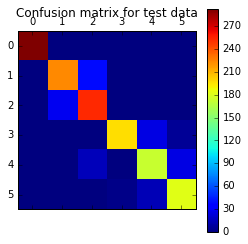

In [9]:
import pylab as pl
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

In [10]:
# 计算一下其他的对预测效果的评估指标
# 详细内容请看 [6],[7],[8],[9]

In [12]:
# Accuracy
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))

Accuracy = 0.900337


In [13]:
# Precision
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

Precision = 0.902996


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [14]:
# Recall
print("Recall = %f" %(skm.recall_score(test_truth,test_pred)))

Recall = 0.900337


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [15]:
# F1 Score
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

F1 score = 0.900621


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


### 下面是一些参考资料

[1] Original dataset as R data https://spark-public.s3.amazonaws.com/dataanalysis/samsungData.rda  
[2] Human Activity Recognition Using Smartphones http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones  
[3] Android Developer Reference http://developer.android.com/reference/android/hardware/Sensor.html  
[4] Random Forests http://en.wikipedia.org/wiki/Random_forest  
[5] Confusion matrix http://en.wikipedia.org/wiki/Confusion_matrix
[6] Mean Accuracy http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=1054102&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D1054102

[7] Precision http://en.wikipedia.org/wiki/Precision_and_recall
[8] Recall http://en.wikipedia.org/wiki/Precision_and_recall
[9] F Measure http://en.wikipedia.org/wiki/Precision_and_recall